In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Weather.csv")
df

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,43815.00000,6.220954,0.0,0.000000e+00,-72.0,215.0,0.0,80.6,6.9,32.0,4.7
1,43815.00347,6.220954,0.0,0.000000e+00,-73.0,0.0,0.0,80.6,6.9,32.0,4.7
2,43815.00694,6.205565,0.0,0.000000e+00,-76.0,0.0,0.0,80.4,6.9,32.0,4.7
3,43815.01042,6.190173,0.0,0.000000e+00,-77.0,0.0,0.0,80.2,6.9,32.0,4.7
4,43815.01389,6.162624,0.0,0.000000e+00,-75.0,0.0,0.0,80.9,6.7,32.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...
47804,43980.98611,9.286397,0.0,9.999999e-01,-85.0,2992.0,0.0,71.4,15.1,2.0,4.3
47805,43980.98958,9.242139,0.0,1.000000e+00,-85.0,2992.0,0.0,71.5,15.0,2.0,4.3
47806,43980.99306,9.152067,0.0,3.350000e-08,-84.0,2992.0,0.0,70.8,15.0,2.0,3.8
47807,43980.99653,9.177802,0.0,0.000000e+00,-85.0,2992.0,0.0,71.0,15.0,2.0,3.8


## **Parameters Description**

Tout - Outside temperature

Rhout - Outside relative humidity

Iglob - Solar Radiation

Windsp - Wind speed 

RadSum - Radiation sum

Winddir - Wind direction 

Rain Rain - (status 1=rain, 0=dry)

PARout - PAR weather measurement 

Pyrgeo - Heat emission: pyrgeometer

AbsHumOut - Absolute humidity content of outside
air 

In [4]:
df.columns

Index(['%time', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %time      47809 non-null  float64
 1   AbsHumOut  47738 non-null  float64
 2   Iglob      47738 non-null  float64
 3   PARout     47738 non-null  float64
 4   Pyrgeo     47738 non-null  float64
 5   RadSum     47738 non-null  float64
 6   Rain       47738 non-null  float64
 7   Rhout      47738 non-null  float64
 8   Tout       47738 non-null  float64
 9   Winddir    47738 non-null  float64
 10  Windsp     47738 non-null  float64
dtypes: float64(11)
memory usage: 4.0 MB


In [8]:
df.describe()

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
count,47809.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000,47738.000000
mean,43898.000000,6.569647,125.296703,250.270026,-52.871381,477.410229,0.052579,74.847942,9.025341,28.636369,4.982486
std,47.921576,1.733592,222.006296,443.856662,36.340826,724.258902,0.223193,19.873991,4.229593,26.860777,3.849020
min,43815.000000,0.879099,0.000000,0.000000,-136.000000,0.000000,0.000000,10.100003,-0.200000,1.000000,0.000000
25%,43856.500000,5.446391,0.000000,0.000000,-84.000000,0.000000,0.000000,61.700000,6.300000,4.000000,2.200000
50%,43898.000000,6.568635,0.000000,1.000000,-54.000000,122.000000,0.000000,79.300000,8.400000,32.000000,4.200000
75%,43939.500000,7.701009,146.000002,287.000000,-17.000000,613.000000,0.000000,91.275000,11.000000,32.000004,7.100000
max,43981.000000,12.427134,1505.000000,2010.000000,0.000000,2999.000000,1.000000,99.700000,27.300000,128.000000,21.900000


### Count null values in each parameter and remove that null entry row 

In [10]:
df.isna().sum()

%time         0
AbsHumOut    71
Iglob        71
PARout       71
Pyrgeo       71
RadSum       71
Rain         71
Rhout        71
Tout         71
Winddir      71
Windsp       71
dtype: int64

In [11]:
df.dropna(axis=0, inplace=True)

In [12]:
df.isna().sum()

%time        0
AbsHumOut    0
Iglob        0
PARout       0
Pyrgeo       0
RadSum       0
Rain         0
Rhout        0
Tout         0
Winddir      0
Windsp       0
dtype: int64

### Find Correlation among each parameter and plot them

In [14]:
correlation=df.corr()
correlation

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
%time,1.000000,-0.097391,0.433156,0.432307,-0.501299,0.489309,-0.089160,-0.605500,0.528400,-0.158334,-0.171203
AbsHumOut,-0.097391,1.000000,-0.177928,-0.165535,0.436001,-0.166351,0.132421,0.562785,0.386353,0.214923,0.103749
Iglob,0.433156,-0.177928,1.000000,0.989755,-0.541869,0.378981,-0.108420,-0.623804,0.548331,-0.096872,0.051203
PARout,0.432307,-0.165535,0.989755,1.000000,-0.537721,0.374848,-0.106953,-0.617752,0.554088,-0.089668,0.053413
Pyrgeo,-0.501299,0.436001,-0.541869,-0.537721,1.000000,-0.473681,0.304190,0.726206,-0.351603,0.176792,0.148733
RadSum,0.489309,-0.166351,0.378981,0.374848,-0.473681,1.000000,-0.097963,-0.607977,0.532515,-0.106700,-0.049687
Rain,-0.089160,0.132421,-0.108420,-0.106953,0.304190,-0.097963,1.000000,0.210661,-0.079726,0.016621,0.118549
Rhout,-0.605500,0.562785,-0.623804,-0.617752,0.726206,-0.607977,0.210661,1.000000,-0.516922,0.217928,-0.005474
Tout,0.528400,0.386353,0.548331,0.554088,-0.351603,0.532515,-0.079726,-0.516922,1.000000,-0.027314,0.084393
Winddir,-0.158334,0.214923,-0.096872,-0.089668,0.176792,-0.106700,0.016621,0.217928,-0.027314,1.000000,0.352165


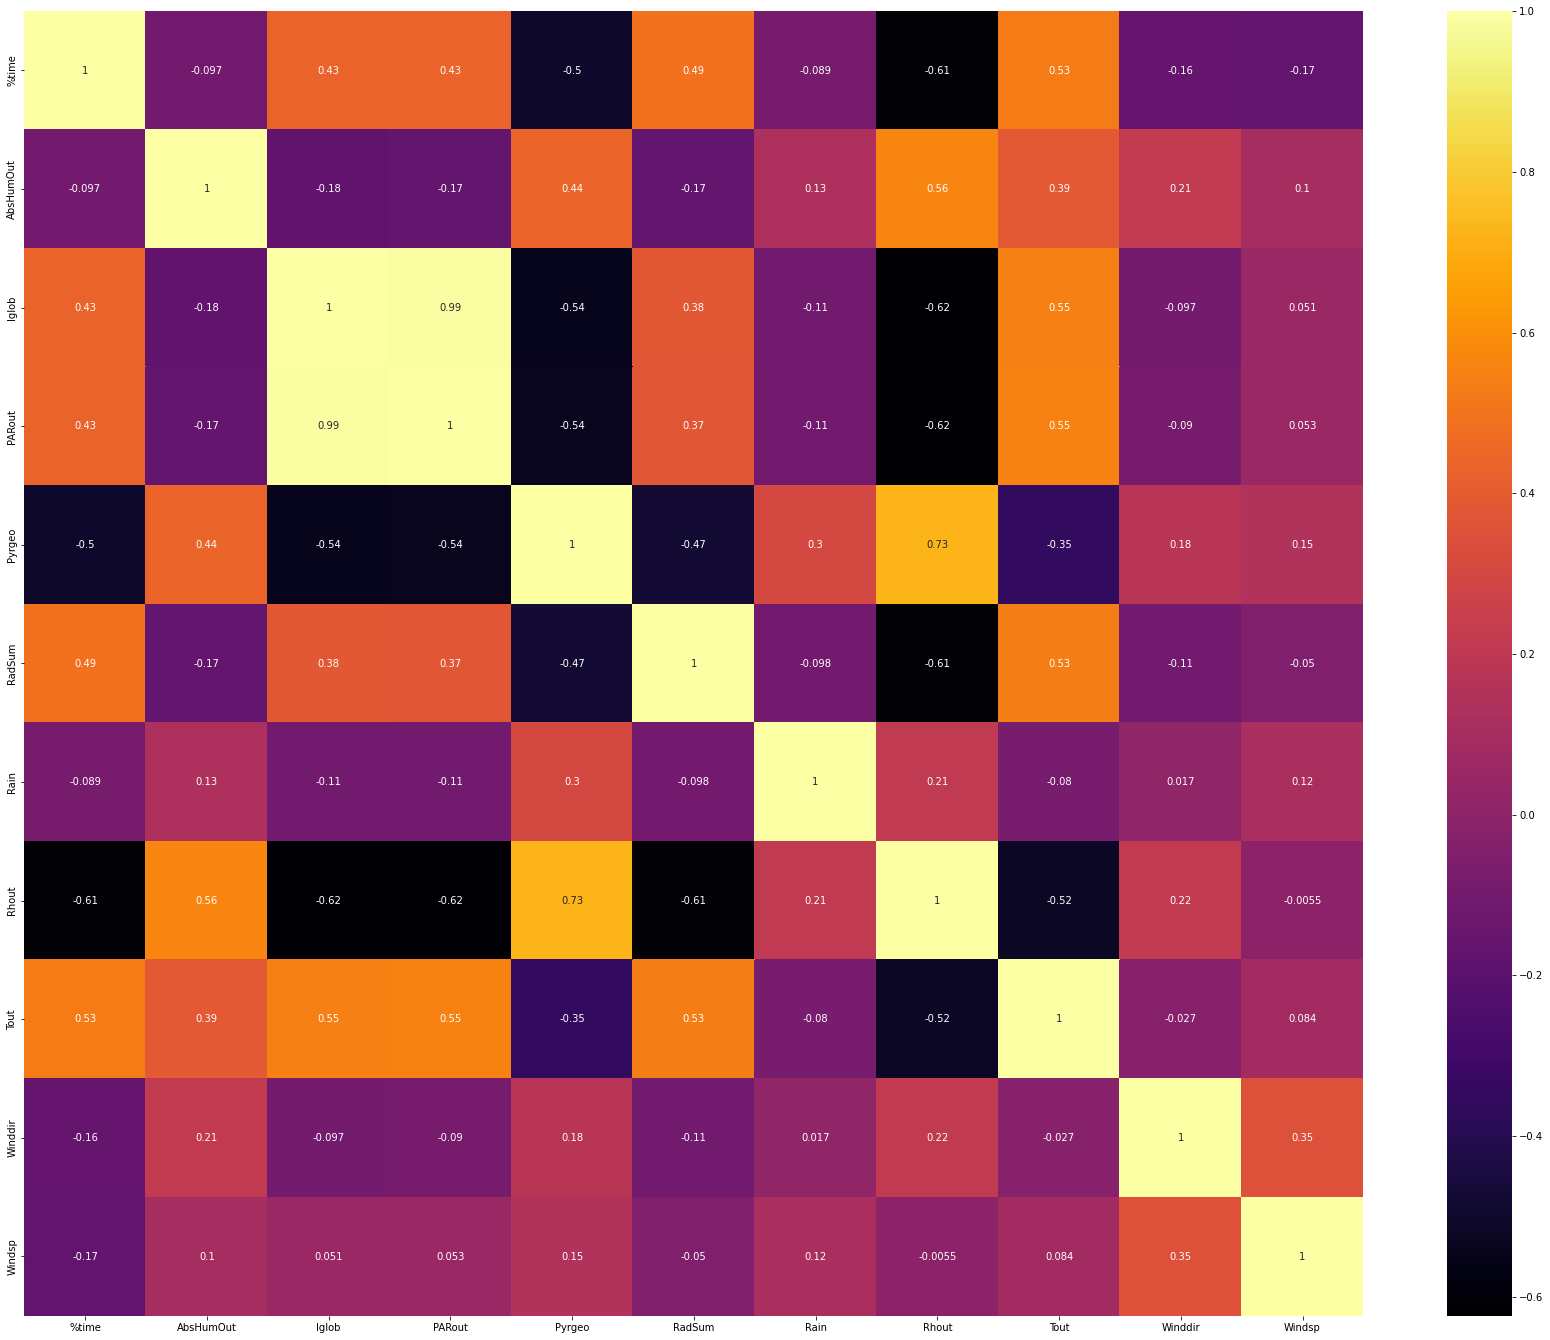

In [15]:
plt.rcParams['figure.figsize'] = [30, 24]
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,cmap='inferno')
plt.show()

*   **(Iglob, PARout), (Pyrgeo, Rhout) are highly positive correlated**
*   **(Iglob, Pyrgeo), (Iglob, Rhout) are highly negative correlated**



# Line Plot : Paramter vs Time plot

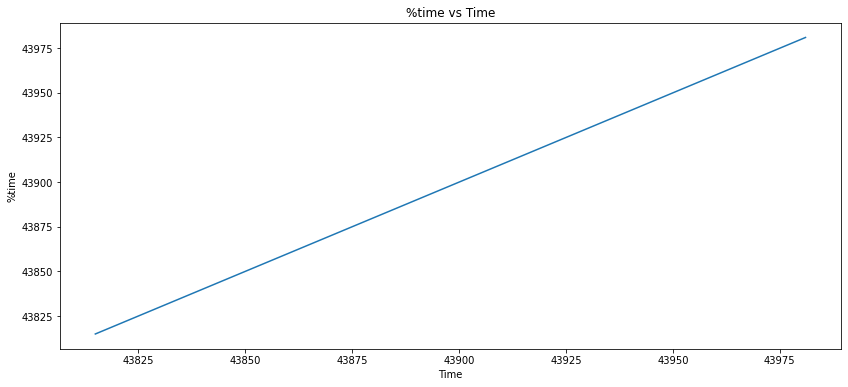

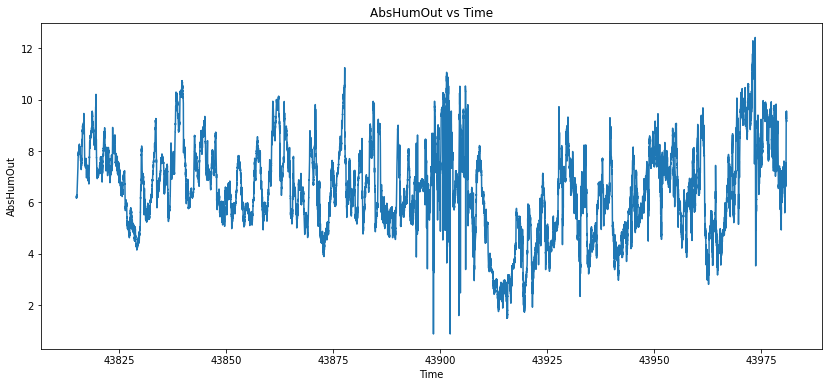

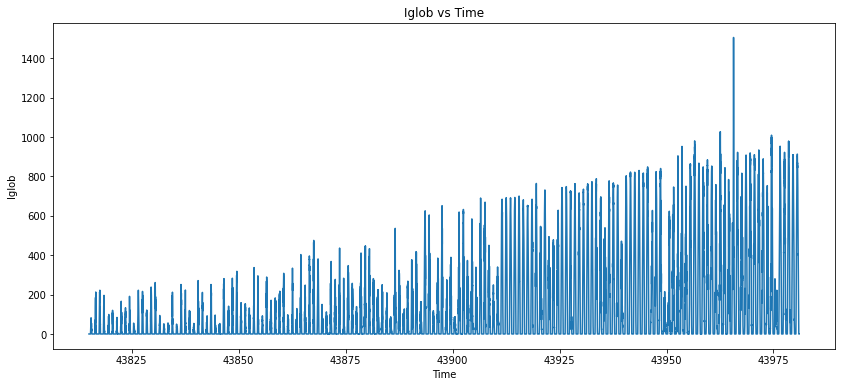

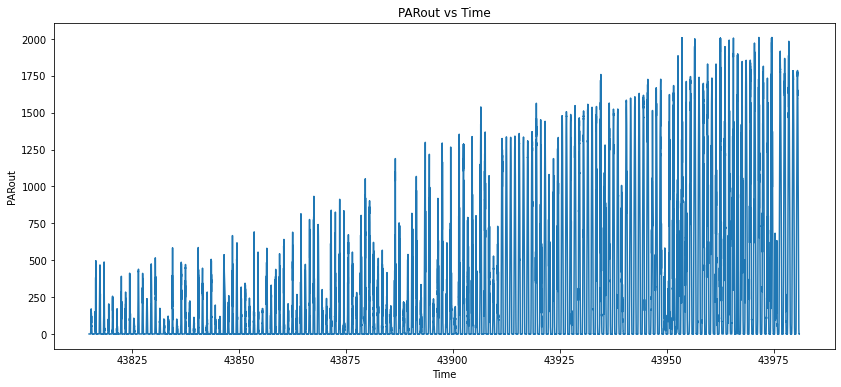

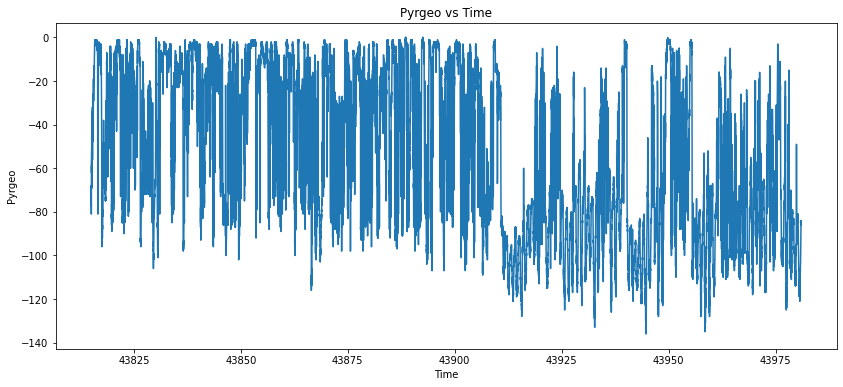

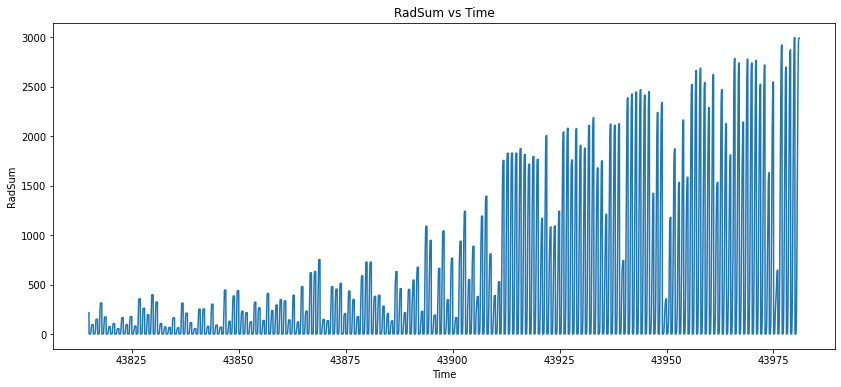

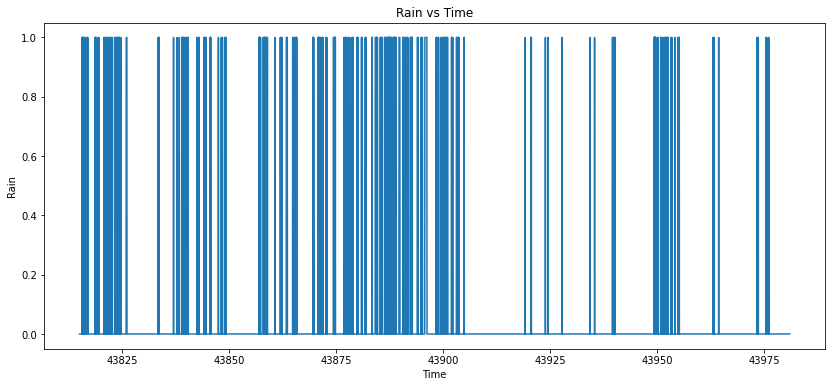

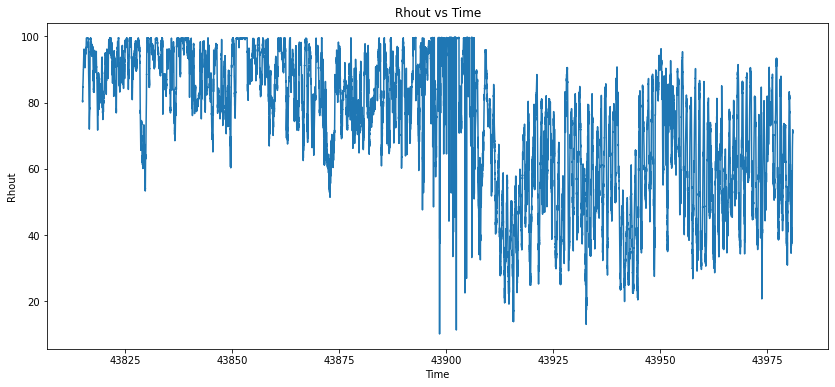

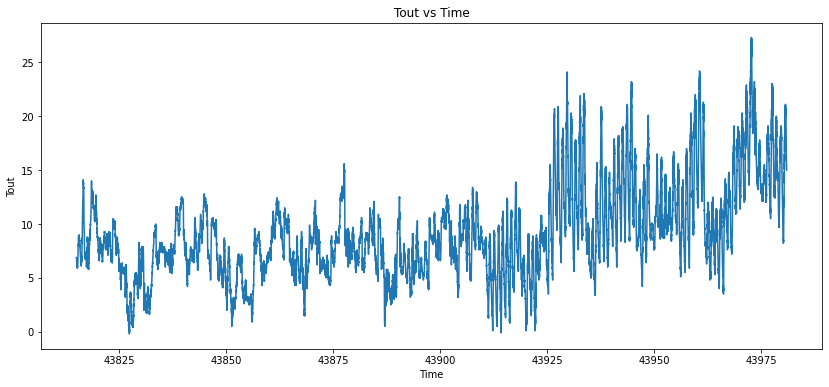

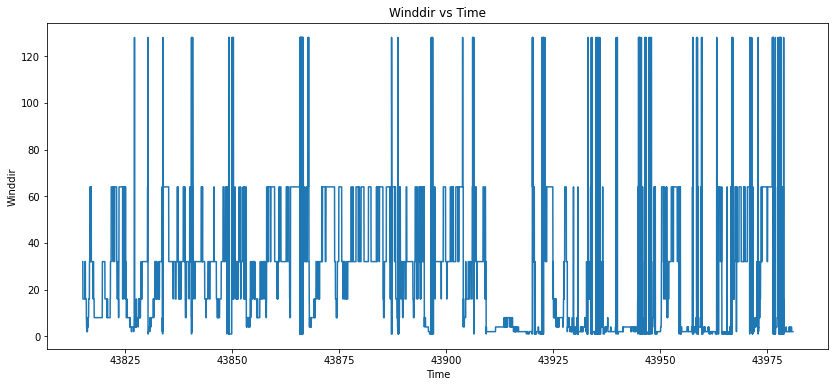

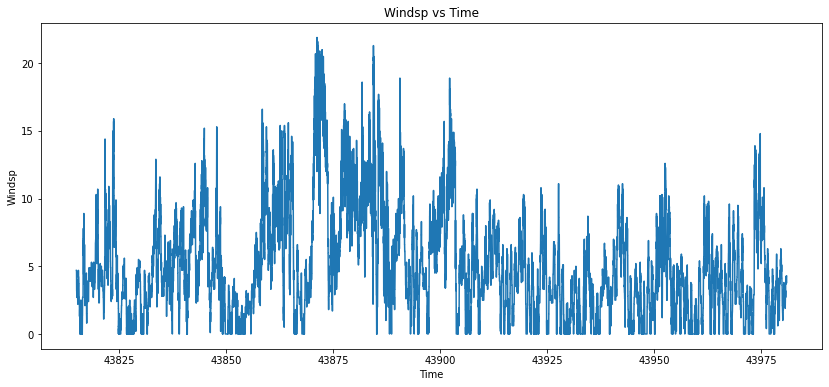

In [17]:
for i in df:
  plt.figure(figsize=(14,6))
  sns.lineplot(data=df, x="%time", y=df[i])
  plt.title("{} vs Time".format(i))
  plt.xlabel("Time")
  plt.ylabel(i)
  plt.show()

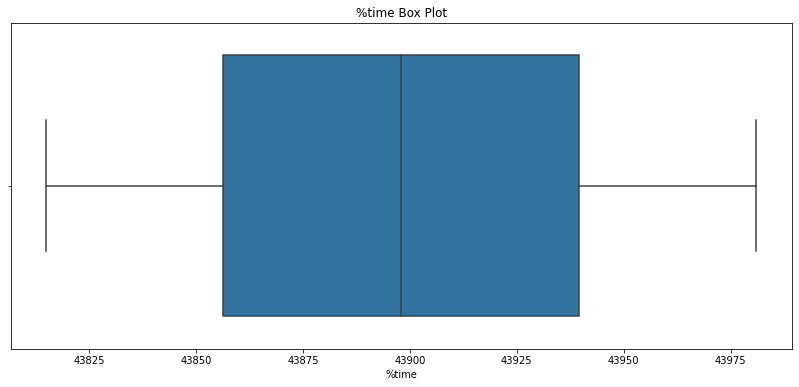

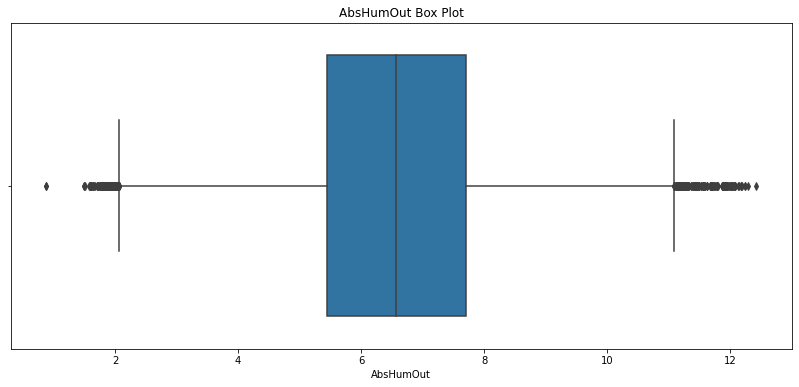

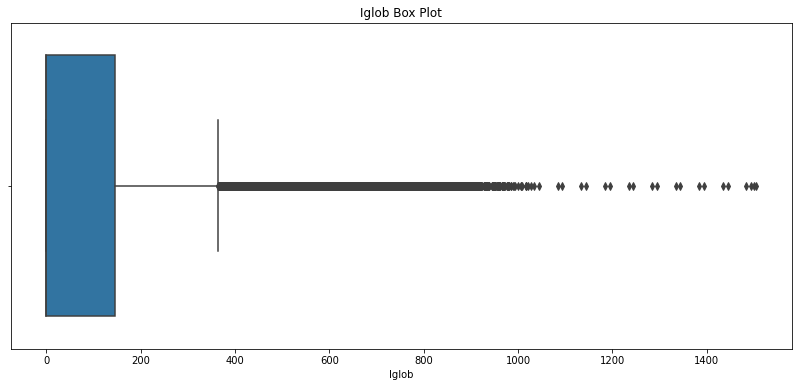

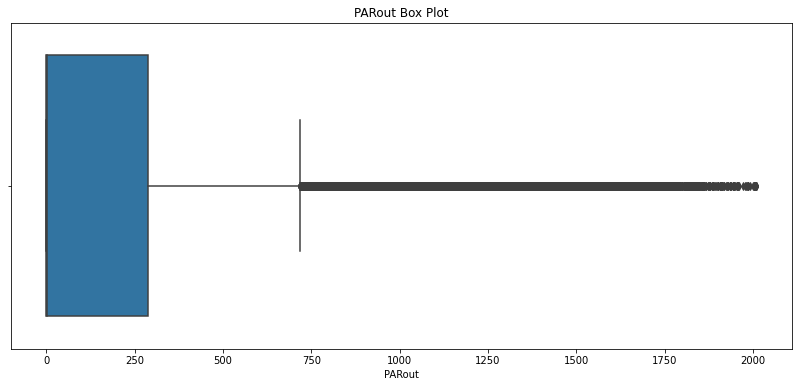

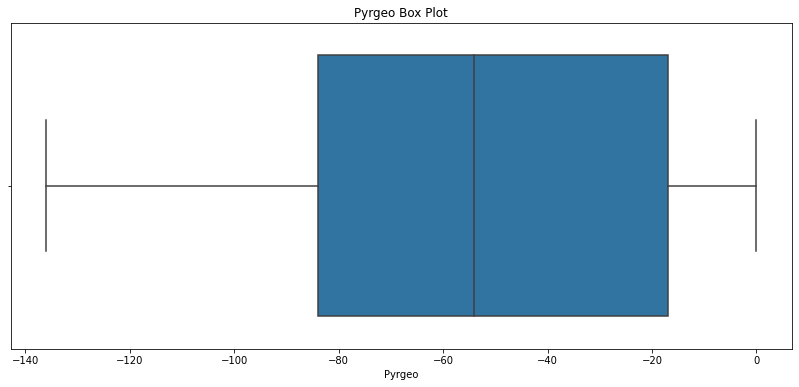

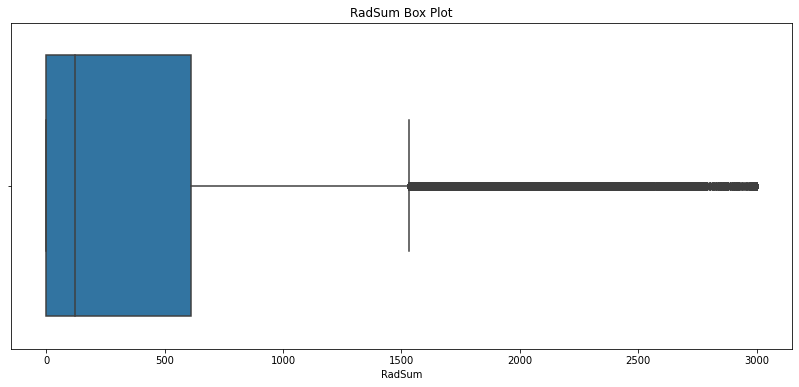

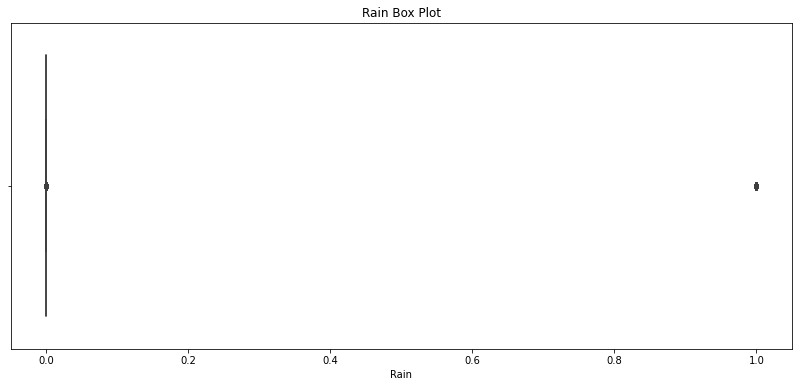

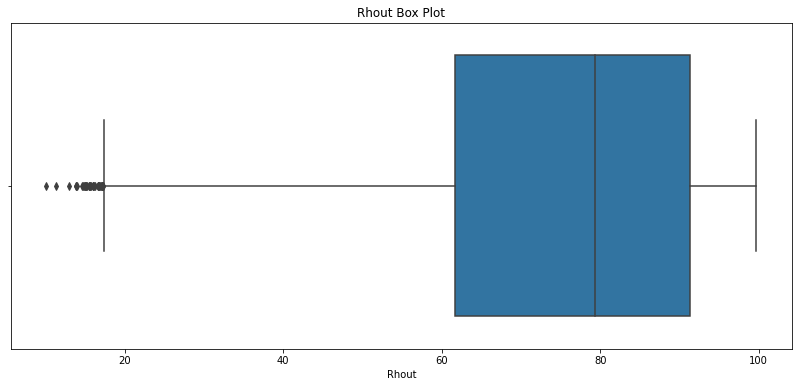

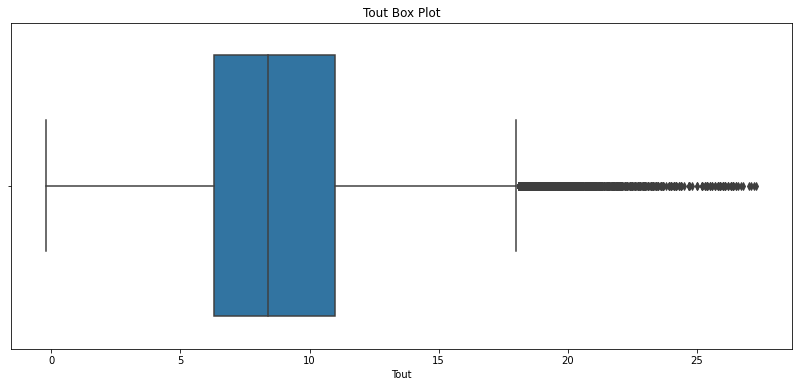

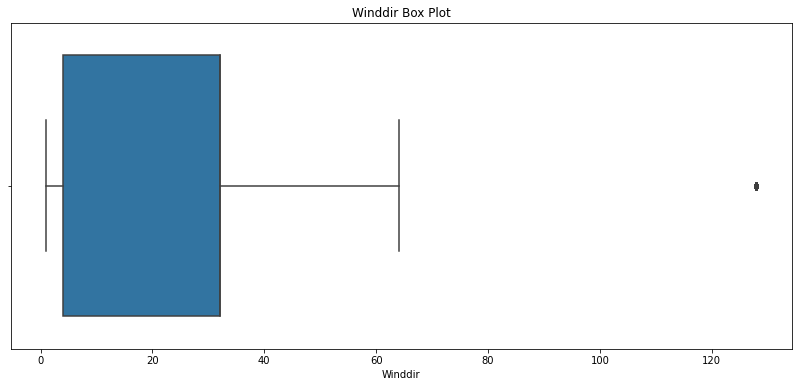

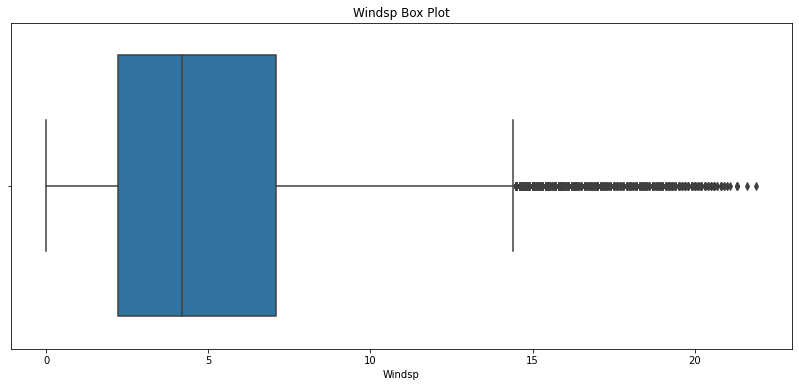

In [18]:
for i in df:
  plt.figure(figsize=(14,6))
  sns.boxplot(x=df[i])
  plt.title("{} Box Plot".format(i))
  plt.show()

# **From the above boxplots, we can easily find minimum level, maximum level, and average level of each parameter of weather**